In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from collections import Counter

**1. Introducción**

El negocio de los seguros de vehículos es un sector de la industria de seguros que proporciona protección financiera a los conductores de automóviles en caso de accidentes, robos u otros eventos imprevistos. El subscriptor del seguro mitiga el riesgo a través de la transferencia de esta misma a la compañía aseguradora. 

Las compañías de seguros de automóviles utilizan una variedad de herramientas y técnicas para evaluar el riesgo asociado con cada conductor y vehículo, incluyendo el historial de manejo del conductor, la marca y modelo del vehículo, la ubicación geográfica y otros factores relevantes. 

Para garantizar la rentabilidad y sostenibilidad de esta industria, la prevención de fraude cumple una tarea fundamental y crítica. El fraude en el sector de los seguros de automóviles puede tener un impacto significativo en las finanzas de una aseguradora, ya que un impacto en el índice de siniestralidad y el cálculo de primas resulta en un aumento de costos.

En este trabajo, analizaremos el dataset de una compañia de seguros. Realizaremos un análisis exploratorio de datos para identificar patrones comunes y evaluar si aplicando árboles de decisión como método de machine learning nos permitiría alcanzar nuestro objetivo.

**Índice**
1. Introducción
2. Contexto
3. Preguntas de interés
4. Inspección de los datos
5. Limpieza de datos

    5.1. Datos duplicados
    
    5.2. Análisis y tratamiento de datos nulos
6. Perfil del denunciante fraudulento

    6.1 Genero y estado marital

    6.2 Rango etario
7. Características más comunes de vehículos reportados en denuncias fraudulentas

    7.1 Antiguedad

    7.2 Top 5 Marcas 

    7.3 Categoría   
8. Correlaciones entre las variables
9. Insights y recomendaciones

**2. Contexto**
La prevención de fraude en las aseguradoras de vehículos implica la implementación de políticas y procedimientos para detectar y prevenir actividades fraudulentas. Estas medidas incluyen la identificación de patrones de comportamientos sospechosos, la evaluación de riesgos y la implementación de herramientas y técnicas de detección de fraude.

El objetivo es utilizar una variedad de herramientas y tecnologías para prevenir y detectar el fraude, como análisis de datos y aprendizaje automático para identificar patrones de comportamiento inusuales, verificación de información para garantizar la autenticidad de las reclamaciones y auditorías internas para garantizar el cumplimiento de las políticas y procedimientos de la aseguradora. Para lograr dicho objetivo, se identificaran patrones y/o tendencias en la población que comete fraude para posteriormente utilizar estos conocimientos para desarrollar estrategias de prevención de fraude dirigidas y mejorar las tasas de detección en general para ayudar a las aseguradoras a protegerse mejor contra pérdidas.

**3. Preguntas de interés**
Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos.

¿Existe una la relación entre género y denuncias fraudulentas? Hay algún sexo predominante?

¿Qué marital status presenta más tendencia a realizar denuncias fraudulentas?

¿Se puede identificar un rango etario?

¿La antiguedad del vehículo asegurado es una variable relevante?

¿Cuáles son las marcas de los vehículos más utilizados al cometer fraude?

¿Influye la categoría del auto?

**4. Inspección de los datos**


In [3]:
df= pd.read_csv(r'C:\Users\moniq\Downloads\Datascience\primera entrega\fraud_oracle.csv', sep=';')

Este dataset de 15420 datos proporciona la siguiente información:

00) Month: mes en el que ocurrió el accidente

01) WeekOfMonth: semana en la que ocurrió el accidente

02) DayOfWeek: Día de la semana en que ocurrió el accidente

03) Make: Marca del vehículo

04) AccidentArea: Si el accidente fue en un área rural o urbana

05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia

06) MonthClaimed: Mes en el que se hizo la denuncia

07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia

08) Sex: Género de la persona que realiza la denuncia

09) MaritalStatus: Estado cívil de la persona que hace la denuncia

10) Age: Edad de la persona que hace la denuncia

11) Fault: Si el culpable fue el dueño del seguro u otro involucrado

12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)

13) VehicleCatergory: Clasificación de tipo de auto

14) VehiclePrice: Precio del vehículo

15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir

16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset

17) RepNumber: Numeración entre 1 y 16

18) Deductible: Costo del seguro

19) DriverRating: Calificación del piloto, puede ser data ordinal

20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente

21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente

22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo

23) AgeOfVehicle: Edad del vehículo

24) AgeOfPolicyHolder: Edad del dueño del seguro

25) PoliceReportFiled: Si fue denunciado a la policía

26) WitnessPresent: Si hubo un testigo presente

27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.

28) NumberOfSuppliments: Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc

29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después

30) NumberOfCars: Número de autos involucrados en el accidente

31) Year: Año en el que ocurrió el accidente

32) BasePolicy: Tipo de seguro

**5. Limpieza de datos**

Divideremos el proceso de limpieza de datos por dos secciones: eliminado de duplicados y tratamiento a datos nulos.

**5.1 Datos duplicados**

In [4]:
df = df.drop_duplicates()


**5.2 Análisis y tratamiento de datos nulos** 

Text(0.5, 1.0, 'Matrix de valores nulos')

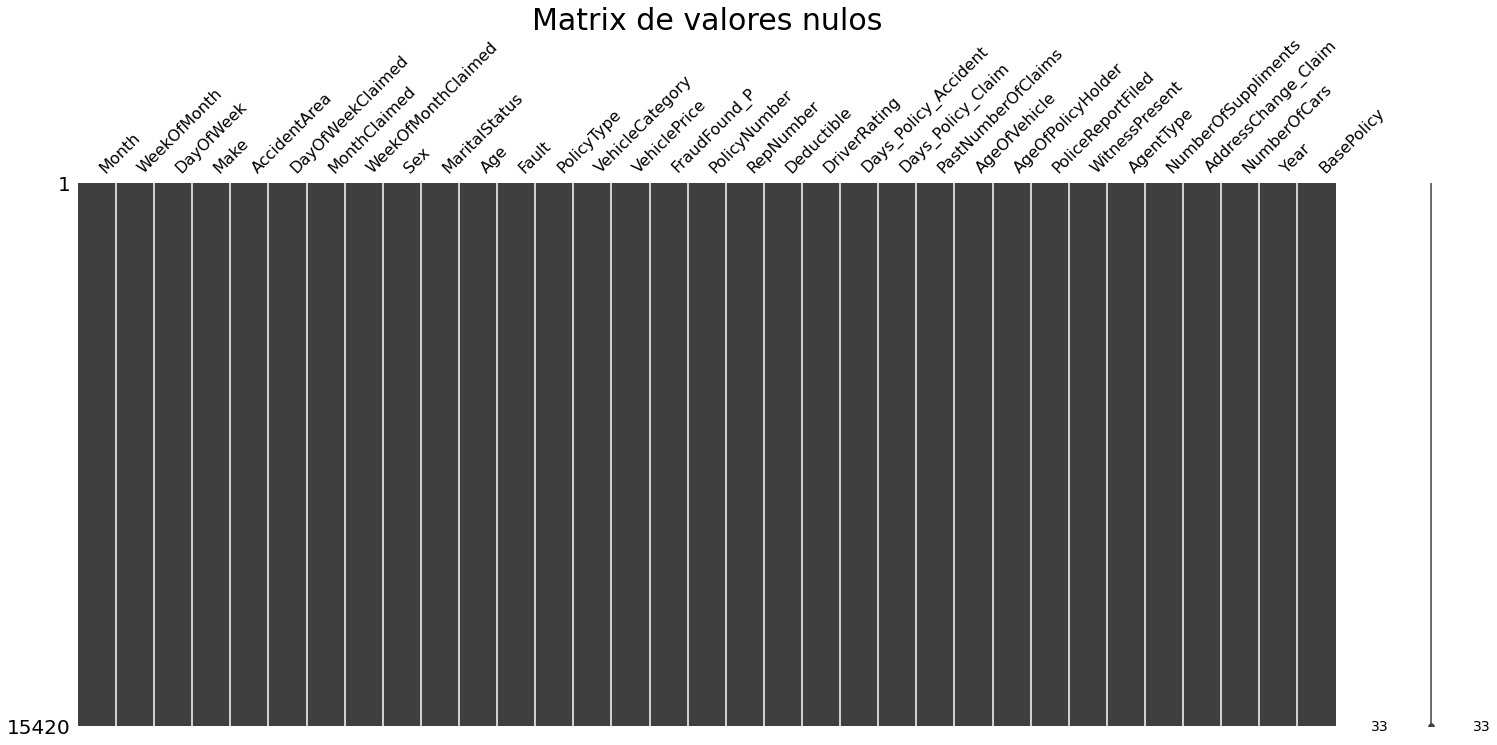

In [5]:
msno.matrix(df)
plt.title("Matrix de valores nulos",fontsize=30)

Tanto la matrix como el método .info() nos indica que no contamos con ninguna fila que contenga datos nulos. Se procederá a analizar si la información ingresada en el dataset es coherente.

In [6]:
for column in df:
    print(column)
    print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

Se analizarán los 0 presentados en Age, DayOfWeekClaimed y MonthClaimed

In [7]:
#Analizo primero la edad
df_age_0 = df.loc[(df['Age'] == 0)]

In [8]:
df_age_0.AgeOfPolicyHolder.value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [9]:
#Como todos los casos con Age=0 indica que el AgeOfPolicyHolder se encuentra entre el rango de los 16-17años, reemplazo la edad por 17
df['Age'] = df['Age'].replace(0, 17)

In [10]:
#Creo una nueva variable "Age_coherent" para analizar si hay más casos inconsistentes entre las variables "Age" y "AgeOfPolicyHolder". 
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace("over 65", "66 to 110")

In [11]:
df["Age_coherent"] = df.apply(lambda x: True if int(x["Age"]) in range(int(x["AgeOfPolicyHolder"].split("to")[0]), int(x["AgeOfPolicyHolder"].split("to")[1])+1) else " ", axis=1)

In [12]:
df[['start_age', 'end_age']] = df['AgeOfPolicyHolder'].str.split(' to ', expand=True).astype(int)
df['age_mean'] = (df['start_age'] + df['end_age']) / 2

In [13]:
df.loc[df['Age'] < df['start_age'], 'Age'] = df['age_mean']

In [14]:
df.loc[df['Age'] > df['end_age'], 'Age'] = df['age_mean']

In [15]:
#Analizo DayOfWeekClaimed y MonthClaimed. 

len(df.loc[df['DayOfWeekClaimed'] == '0'])


1

In [16]:
len(df.loc[df['MonthClaimed'] == '0'])

1

In [17]:
#Remuevo estas el entry donde DayOfWeekClaimed= 0 y MonthClaimed= 0 ya que no tengo otras variables de la cual pueda utilizar para interpolarlas.
df.drop(df[df['DayOfWeekClaimed'] == '0'].index)
df.drop(df[df['MonthClaimed'] == '0'].index)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_coherent,start_age,end_age,age_mean
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,,26,30,28.0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,True,31,35,33.0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,True,41,50,45.5
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,True,51,65,58.0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,,31,35,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,External,none,no change,1 vehicle,1996,Collision,True,31,35,33.0
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,External,more than 5,no change,3 to 4,1996,Liability,,31,35,33.0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,External,1 to 2,no change,1 vehicle,1996,Collision,,26,30,28.0
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,External,more than 5,no change,1 vehicle,1996,All Perils,True,31,35,33.0


In [18]:
#Remuevo variables creadas para remediar la variable Age y también PolicyNumber ya que funciona cumple en este caso la misma función que el index. 
df_cleaned = df.copy().drop(['Age_coherent','start_age','end_age','age_mean','PolicyNumber'], axis=1)

**6. Perfil del denunciante fraudulento**

Se proveerá de un primer panorama general de los datos y luego se procederá a analizar en detalle el género, estado marital y rango etario. 

In [19]:
#Creo subdataset para obtener solo la información de los reclamos fraudulentos filtrando por FraudFound_P=1

df_fraud = df_cleaned.loc[(df_cleaned['FraudFound_P'] == 1)]


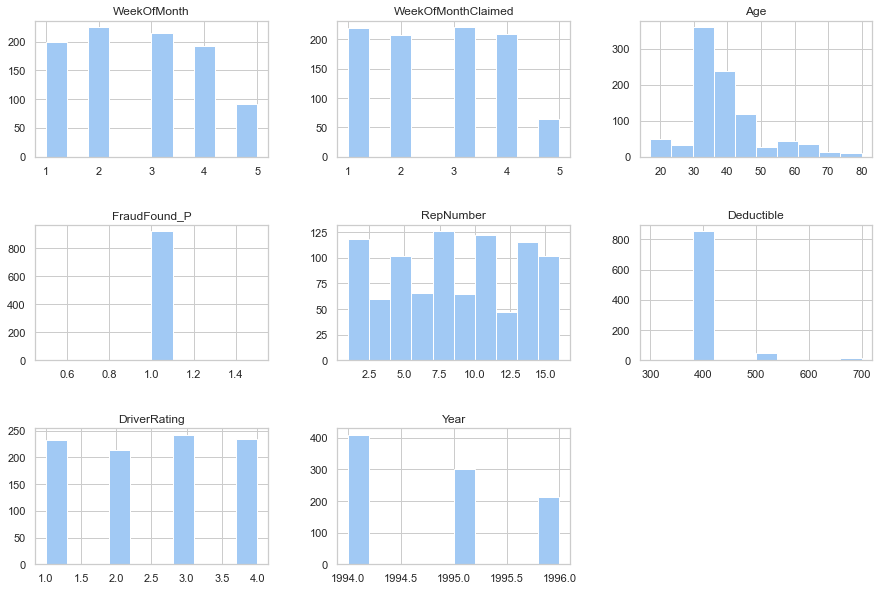

In [34]:
sns.set_palette("pastel")
df_fraud.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

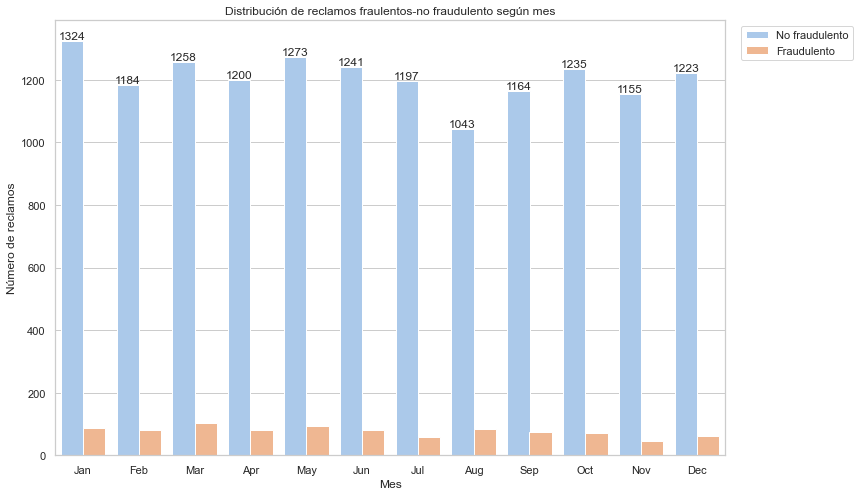

In [46]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 8))
labels = ['No fraudulento', 'Fraudulento']
fig = sns.countplot(x="Month", hue ='FraudFound_P', data=df_cleaned, order= month_order,palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraulentos-no fraudulento según mes')
plt.xlabel('Mes')
plt.ylabel('Número de reclamos')
plt.show()

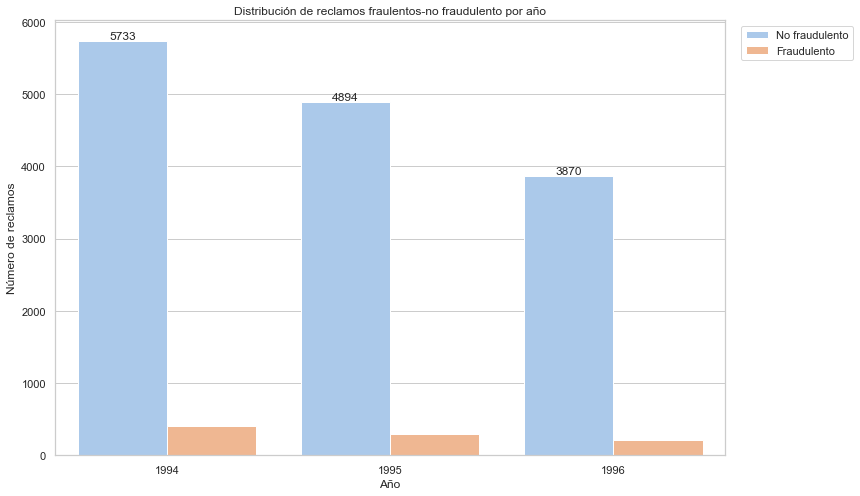

In [48]:
plt.figure(figsize=(12, 8))
labels = ['No fraudulento', 'Fraudulento']
fig = sns.countplot(x="Year", hue ='FraudFound_P', data=df_cleaned, palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraulentos-no fraudulento por año')
plt.xlabel('Año')
plt.ylabel('Número de reclamos')
plt.show()

In [22]:
#De este subdataset df_fraud, remuevo variables redundantes para analizar variables específicas que posibiliten identificar un perfil con caracteristicas comunes de quienes cometen fraude.
df_fraud_cleaned = df_fraud.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','RepNumber','Deductible','DriverRating', 'Days_Policy_Accident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)

 **6.1 Género y estado marital**

Text(0.5, 1.0, 'Estado marital segmentado por sexo')

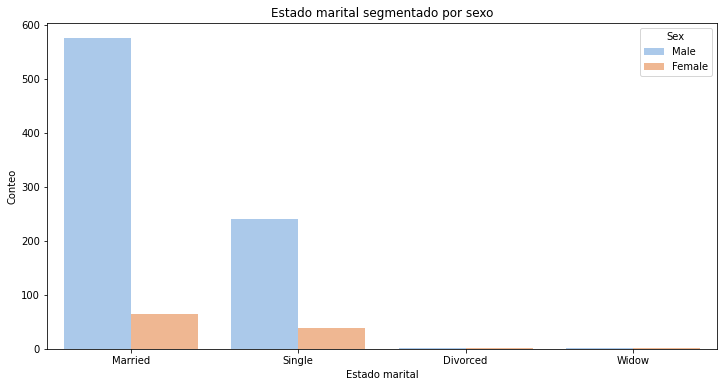

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MaritalStatus', hue='Sex', data=df_fraud_cleaned, order=df_fraud_cleaned['MaritalStatus'].value_counts(ascending=False).index,palette='pastel')
plt.xlabel('Estado marital')
plt.ylabel('Conteo')
plt.title("Estado marital segmentado por sexo")

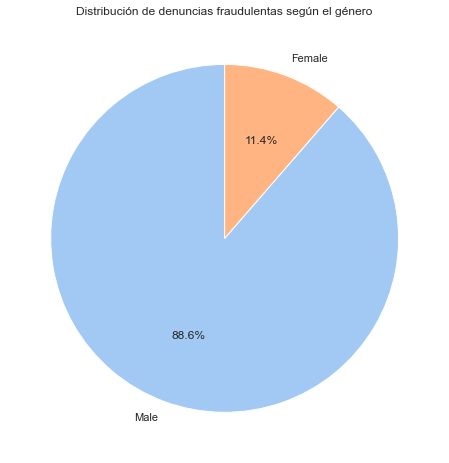

In [40]:
counts = df_fraud_cleaned['Sex'].value_counts() 
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de denuncias fraudulentas según el género')
plt.show()

 **6.2 Rango etario**

Text(0.5, 1.0, 'Sexo segmentado por rango de edad del asegurado')

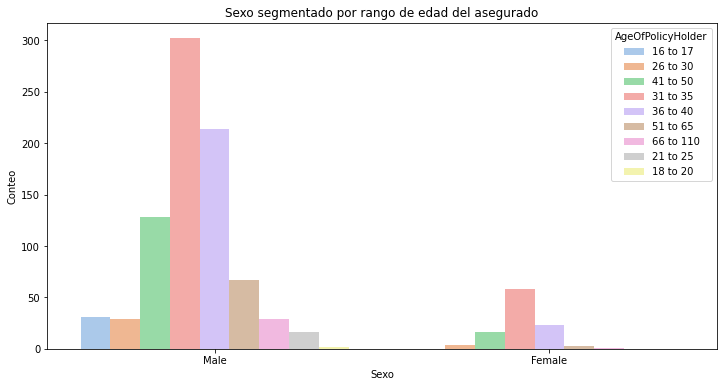

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='AgeOfPolicyHolder', data=df_fraud_cleaned,palette='pastel')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.title("Sexo segmentado por rango de edad del asegurado")

Text(0.5, 1.0, 'Edad')

<Figure size 864x432 with 0 Axes>

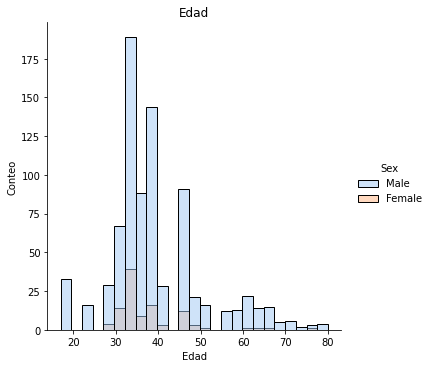

In [25]:
plt.figure(figsize=(12, 6))
sns.displot(df_fraud_cleaned,x ='Age',hue = 'Sex', palette='pastel')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.title("Edad")

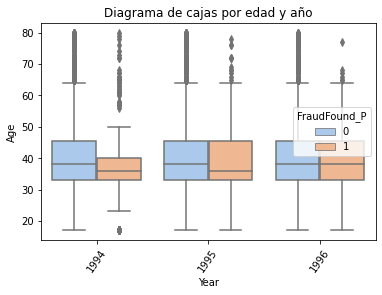

In [26]:
sns.boxplot(data= df_cleaned, x= 'Year', y='Age', hue= 'FraudFound_P',palette='pastel')
plt.xticks(rotation = 55)
plt.title("Diagrama de cajas por edad y año")
plt.show()


Este primer análisis indicaría que el perfil del defraudador cumple mayoritariamente con las siguientes características. Género masculino, entre 32-34 o 38-40 años edad con situación marital casado o soltero. 

**7. Características más comunes de vehículos reportados en denuncias fraudulentas**

Se analizará la antiguedad, marcas y categoría.

**7.1 Antiguedad**

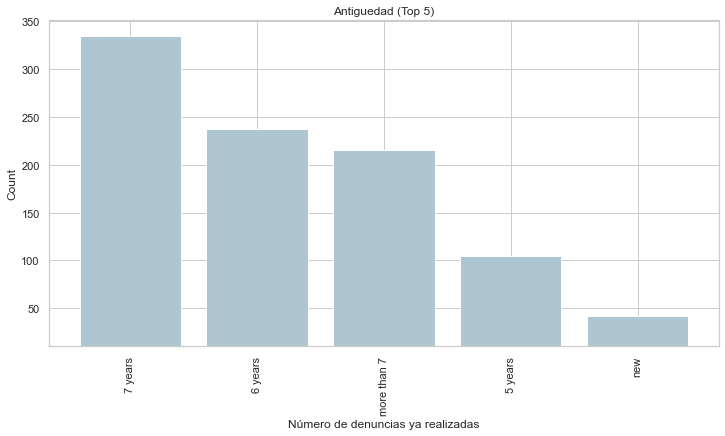

In [47]:
PastNumberOfClaims_count = df_fraud_cleaned['AgeOfVehicle']
freqs = Counter(PastNumberOfClaims_count)

top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))

plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values(), color='#AEC6CF', width=0.8, bottom=10)
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Número de denuncias ya realizadas')
plt.ylabel('Count')
plt.title("Antiguedad (Top 5)")
plt.show()



**7.2 Top 5 Marcas**

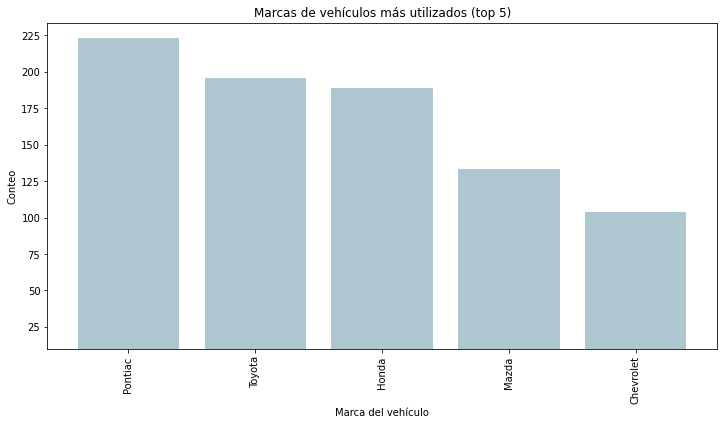

In [28]:
Make_count = df_fraud_cleaned['Make']
freqs = Counter(Make_count)
top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))
plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values() , color='#AEC6CF', width=0.8, bottom= 10)
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Marca del vehículo')
plt.ylabel('Conteo')
plt.title("Marcas de vehículos más utilizados (top 5)")
plt.show()

**7.3 Categoría**

Text(0.5, 1.0, 'Relación entre sexo y categoría del vehiculo')

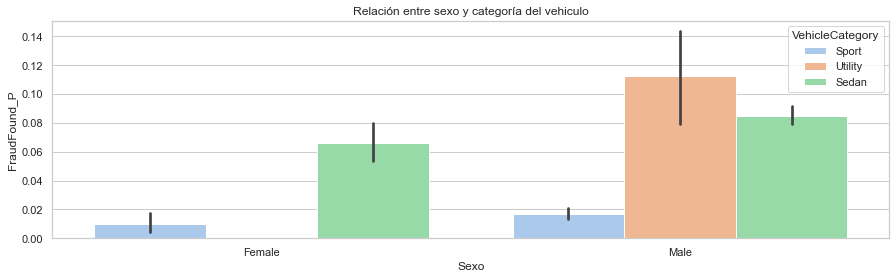

In [29]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = df_cleaned,palette='pastel')
plt.xlabel('Sexo')
plt.title('Relación entre sexo y categoría del vehiculo')

En cuanto a características del automóvil reportados con mayor frecuencia en denuncias fraudulentas son vehículos que presenten un mínimo de 5 años de antiguedad de las siguientes marcas: Pontiac, Toyota, Honda, Mazda, Chevrolet con categorias Utility y Sedan.

**8. Correlaciones entre las variables**

In [30]:
#Vuelvo al dataset original df. Remuevo colummas de variables que no considero relevantes.

df_fraud_mapped = df_cleaned.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'Age','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','RepNumber','Deductible','DriverRating', 'Days_Policy_Accident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)
df_fraud_mapped.head()

,Make,Sex,MaritalStatus,Fault,VehicleCategory,FraudFound_P,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Female,Single,Policy Holder,Sport,0,more than 30,none,3 years,26 to 30,1 year,3 to 4,Liability
1,Honda,Male,Single,Policy Holder,Sport,0,more than 30,none,6 years,31 to 35,no change,1 vehicle,Collision
2,Honda,Male,Married,Policy Holder,Sport,0,more than 30,1,7 years,41 to 50,no change,1 vehicle,Collision
3,Toyota,Male,Married,Third Party,Sport,0,more than 30,1,more than 7,51 to 65,no change,1 vehicle,Liability
4,Honda,Female,Single,Third Party,Sport,0,more than 30,none,5 years,31 to 35,no change,1 vehicle,Collision


Paso de datos categóricos a numéricos

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Brand = le.fit_transform(df['Make'])

df_fraud_mapped.drop("Make", axis=1, inplace=True)
df_fraud_mapped["Make"] = Brand


In [32]:
df_fraud_mapped["Sex"]=df_fraud_mapped["Sex"].map({'Female':0, 'Male':1})
df_fraud_mapped["MaritalStatus"]=df_fraud_mapped["MaritalStatus"].map({'Single':0, 'Married':1, 'Widow':2, 'Divorced':3})
df_fraud_mapped["Fault"]=df_fraud_mapped["Fault"].map({'Policy Holder':0, 'Third Party':1})
df_fraud_mapped["VehicleCategory"]=df_fraud_mapped["VehicleCategory"].map({'Sport':0, 'Utility':1, 'Sedan':2})
df_fraud_mapped["PastNumberOfClaims"]=df_fraud_mapped["PastNumberOfClaims"].map({'none':0, '1':1, '2 to 4':2, 'more than 4':3})
df_fraud_mapped["AgeOfVehicle"]=df_fraud_mapped["AgeOfVehicle"].map({'3 years':2, '6 years':5, '7 years':6, 'more than 7':7, '5 years':4, 'new':0,'4 years':3, '2 years':1})
df_fraud_mapped["AgeOfPolicyHolder"]=df_fraud_mapped["AgeOfPolicyHolder"].map({'26 to 30':0, '31 to 35':1, '41 to 50':2, '51 to 65':3, '21 to 25':4,'36 to 40':5, '16 to 17':6, 'over 65':7, '18 to 20':8})
df_fraud_mapped["AddressChange_Claim"]=df_fraud_mapped["AddressChange_Claim"].map({'1 year':0, 'no change':1, '4 to 8 years':2, '2 to 3 years':3,'under 6 months':4})
df_fraud_mapped["NumberOfCars"]=df_fraud_mapped["NumberOfCars"].map({'3 to 4':0, '1 vehicle':1, '2 vehicles':2, '5 to 8':3, 'more than 8':4})
df_fraud_mapped["BasePolicy"]=df_fraud_mapped["BasePolicy"].map({'Liability':0, 'Collision':1, 'All Perils':2})
df_fraud_mapped["Days_Policy_Claim"]=df_fraud_mapped["Days_Policy_Claim"].map({'None':0, '8 to 15':1, '15 to 30':2,'more than 30':3})

<AxesSubplot:>

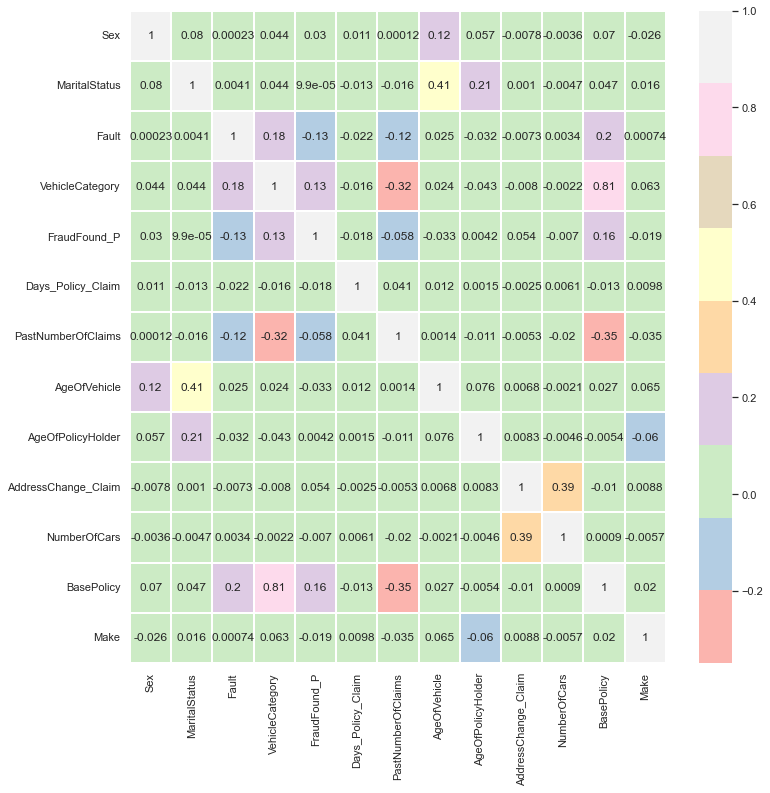

In [33]:
data_corr= df_fraud_mapped.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='Pastel1', linewidths=0.1, annot=True, linecolor='white')

**9. Insights y recomendaciones**

En resumen, el análisis exploratorio de datos revela que puede haber una relación entre ciertas características demográficas y la probabilidad de fraude. Específicamente los titulares de póliza de género masculino entre 31-35 años seguido de 35-40 años presentan tendencia a cometer fraudes de seguro. Este análisis también revela otros patrones y tendencias interesantes en el fraude de seguros. Por ejemplo, se encontró que los automóviles con mayor años de antiguedad de la categoría Utility o Sedan y las siguientes marcas son los más reportados en casos fraudulentos: Pontiac, Toyota, Honda, Mazda, Chevrolet.

El fraude es un problema significativo en la industria y estos conocimientos pueden utilizarse para desarrollar modelos de detección de fraude más sofisticados. Estos hallazgos subrayan la importancia de implementar medidas sólidas de detección de fraude y monitorear regularmente los datos de reclamaciones en busca de anomalías, permitiendo a las aseguradoras pueden tomar medidas proactivas para prevenir el fraude y proteger su rentabilidad.

Recomendaciones:

1. Analizar otras variables que tengan un coeficiente de correlación relevante con la variable FraudFound_P según el heatmap.

2. Realizar un control más exhaustivo durante la verificación de antecedentes para detectar cualquier historial de fraude o comportamiento sospechoso por parte de los subscriptores. 

3. Evaluar aplicar métodos de aprendizaje supervisado para entrenar un modelo que aprenda a distinguir entre reclamos fraudulentos y no fraudulentos a partir de un conjunto de datos etiquetados con algoritmos como: logistic regression, decision trees, random forest, SVM, entre otros.